<a href="https://colab.research.google.com/github/limeng1011/techstockanalysis/blob/main/StockMarketAnalysis022422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import datetime as dt

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
%pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 7.9 MB/s 
     |████████████████████████████████| 62 kB 33.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import yfinance as yf

In [ ]:
#'AAPL', 'GOOG', 'MSFT', 'AMZN'
AAPL = yf.Ticker('AAPL').history(period='1y')
GOOG = yf.Ticker('GOOG').history(period='1y')
MSFT = yf.Ticker('MSFT').history(period='1y')
AMZN = yf.Ticker('AMZN').history(period='1y')

In [ ]:
AAPL.shape

(252, 7)

In [ ]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-06-25 to 2022-06-24
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    int64  
 5   Dividends     252 non-null    float64
 6   Stock Splits  252 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 15.8 KB


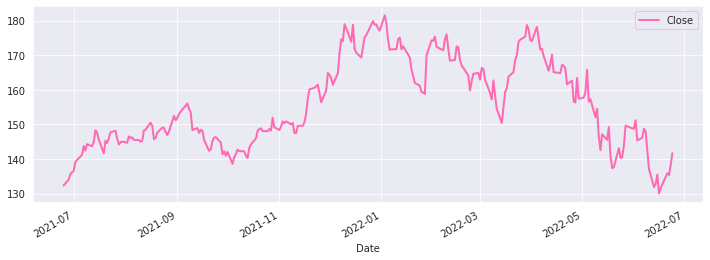

In [ ]:
AAPL['Close'].plot(legend=True, figsize=(12,4), color='hotpink', linewidth=2)

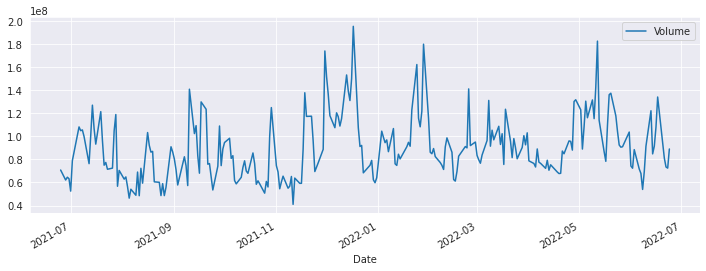

In [ ]:
AAPL['Volume'].plot(legend=True, figsize=(12,4))

In [ ]:
rolling_avg = [10, 20, 50]
for num in rolling_avg:
  AAPL[f'{num}-day rolling'] = AAPL['Close'].rolling(window=num).mean()

In [ ]:
AAPL.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,10-day rolling,20-day rolling,50-day rolling
Date,,,,,,,,,,
2021-06-25,132.701854,133.129404,132.055537,132.353836,70783700,0.0,0,NaN,NaN,NaN
2021-06-28,132.652131,134.481675,132.592474,134.014343,62111300,0.0,0,NaN,NaN,NaN
2021-06-29,134.034235,135.714637,133.586794,135.555542,64556100,0.0,0,NaN,NaN,NaN
2021-06-30,135.396440,136.629402,135.098142,136.181961,63261400,0.0,0,NaN,NaN,NaN
2021-07-01,135.824012,136.549861,134.988772,136.490204,52485800,0.0,0,NaN,NaN,NaN


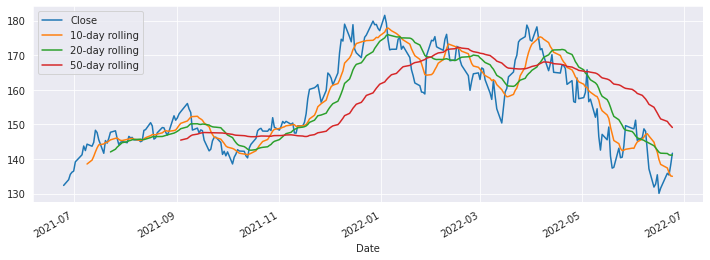

In [ ]:
AAPL[['Close','10-day rolling','20-day rolling','50-day rolling']].plot(legend=True, figsize=(12,4))

In [ ]:
AAPL['Daily return'] = AAPL['Close'].pct_change()

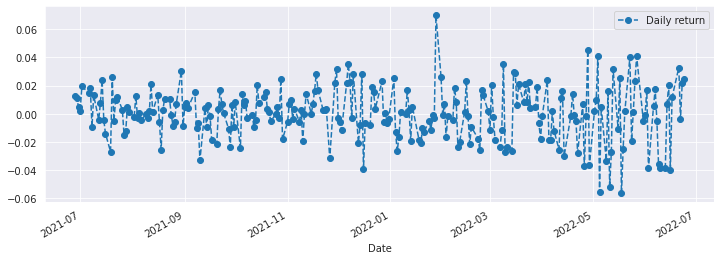

In [ ]:
AAPL['Daily return'].plot(legend=True, figsize=(12,4), marker='o', linestyle='--')

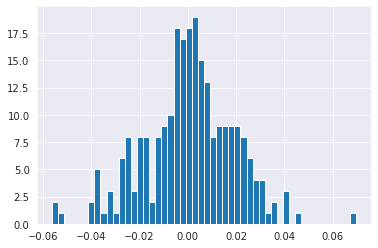

In [ ]:
AAPL['Daily return'].hist(bins=50)

Text(0.5, 1.0, 'The mean is 0.00 and the skewness is -0.14')

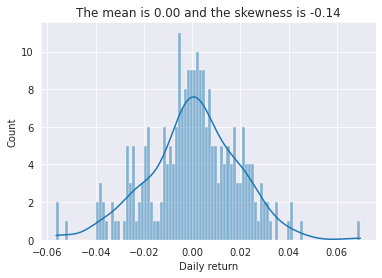

In [ ]:
sns.histplot(data = AAPL,
             x = 'Daily return',
             bins = 100,
             kde = True)
plt.title(f"The mean is {AAPL['Daily return'].mean():.2f} and the skewness is {AAPL['Daily return'].skew():.2f}")

In [ ]:
closing_df = pd.concat([AAPL['Close'], GOOG['Close'], MSFT['Close'], AMZN['Close']], axis=1)

In [ ]:
closing_df.columns = ['AAPL_Close', 'GOOG_Close', 'MSFT_Close', 'AMZN_Close']

In [ ]:
tech_rets = closing_df.pct_change()

In [ ]:
tech_rets.columns = ['AAPL_daily_return', 'GOOG_daily_return', 'MSFT_daily_return', 'AMZN_daily_return']

In [ ]:
tech_rets.dropna(inplace=True)

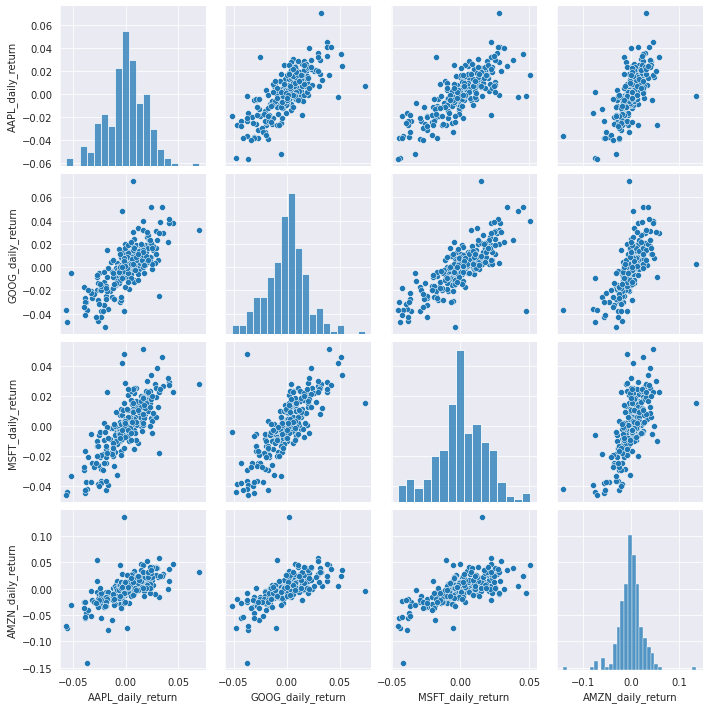

In [ ]:
sns.pairplot(tech_rets)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


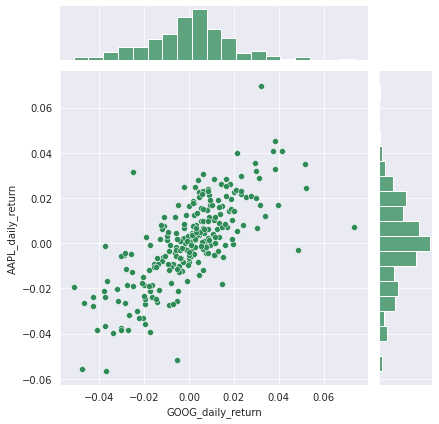

In [ ]:
sns.jointplot('GOOG_daily_return',
              'AAPL_daily_return',
              tech_rets,
              kind = 'scatter',
              color = 'seagreen')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.7936246610912299 1.1674928082256007e-55


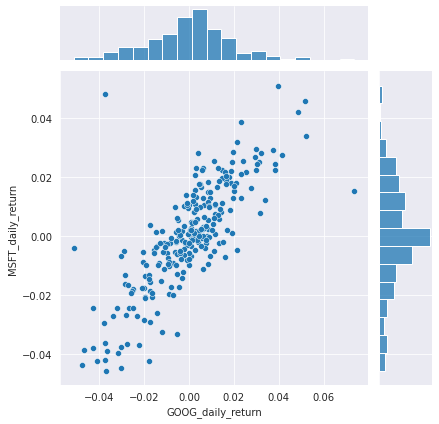

In [ ]:
import scipy.stats as stats

j_plot = sns.jointplot('GOOG_daily_return', 
                       'MSFT_daily_return', 
                       tech_rets, 
                       kind = 'scatter')
r,p = stats.pearsonr(tech_rets['GOOG_daily_return'], 
                     tech_rets['MSFT_daily_return'])
print(r,p)

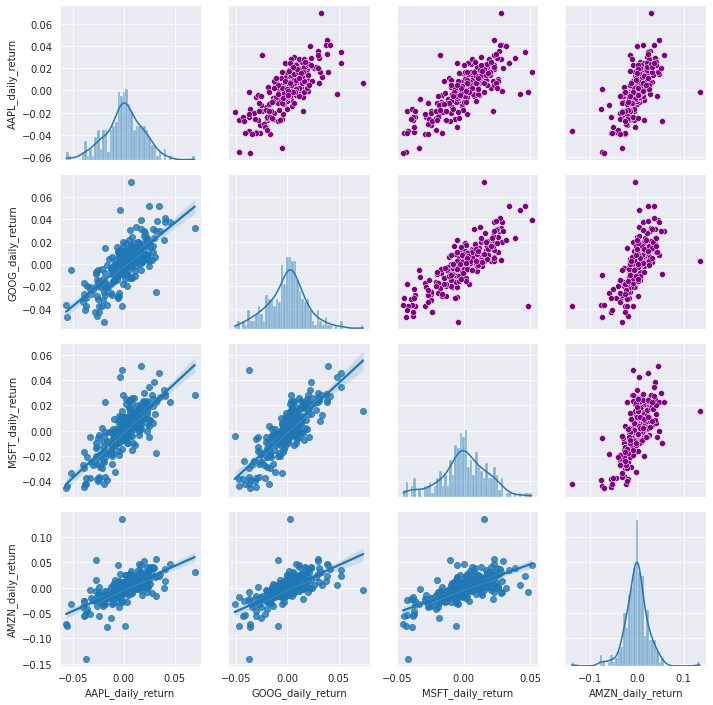

In [ ]:
returns_fig = sns.PairGrid(tech_rets)
returns_fig.map_upper(sns.scatterplot, color='purple')
returns_fig.map_lower(sns.regplot)
returns_fig.map_diag(sns.histplot, bins=50, kde=True)

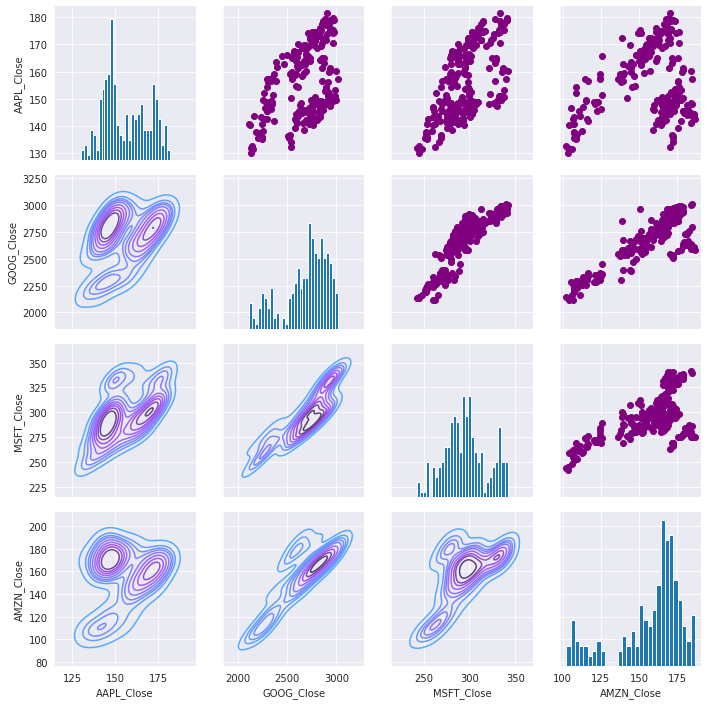

In [ ]:
returns_fig_closing = sns.PairGrid(closing_df)
returns_fig_closing.map_upper(plt.scatter, color='purple')
returns_fig_closing.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig_closing.map_diag(plt.hist, bins=30)

In [ ]:
tech_rets.corr()

,AAPL_daily_return,GOOG_daily_return,MSFT_daily_return,AMZN_daily_return
AAPL_daily_return,1.000000,0.732470,0.776730,0.645562
GOOG_daily_return,0.732470,1.000000,0.793625,0.675121
MSFT_daily_return,0.776730,0.793625,1.000000,0.663045
AMZN_daily_return,0.645562,0.675121,0.663045,1.000000


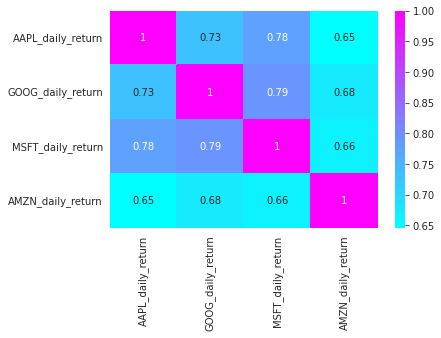

In [ ]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='cool')

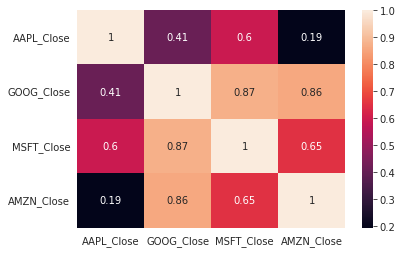

In [ ]:
sns.heatmap(closing_df.corr(), annot=True)

In [ ]:
zip(tech_rets.columns, tech_rets.mean(), tech_rets.std())

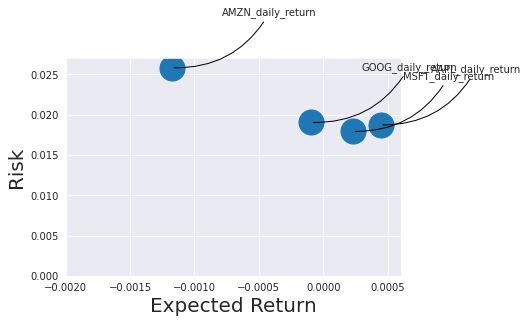

In [ ]:
area = np.pi*200

plt.scatter (x=tech_rets.mean(), y=tech_rets.std(), s=area)
plt.xlabel('Expected Return', size=20)
plt.ylabel('Risk', size=20)

plt.xlim(-0.002, 0.0006)
plt.ylim(0,0.027)

for label, x, y in zip(tech_rets.columns, tech_rets.mean(), tech_rets.std()):
  plt.annotate(
      label,
      xy = (x,y),
      xytext = (50,50),
      textcoords = 'offset points', ha = 'left', va='bottom',
      arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad=-0.3', color='black')

  )


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


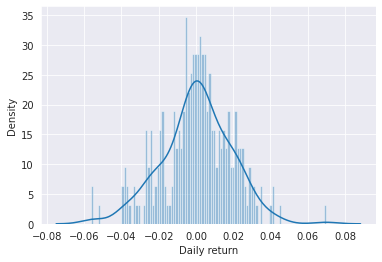

In [ ]:
sns.distplot(AAPL['Daily return'],
             bins=100)

In [ ]:
tech_rets.quantile(0.05)

AAPL_daily_return   -0.032390
GOOG_daily_return   -0.033140
MSFT_daily_return   -0.036405
AMZN_daily_return   -0.037135
Name: 0.05, dtype: float64

In [ ]:
tech_rets.describe()

,AAPL_daily_return,GOOG_daily_return,MSFT_daily_return,AMZN_daily_return
count,252.000000,252.000000,252.000000,252.000000
mean,0.000310,-0.000283,0.000068,-0.001474
std,0.018615,0.018723,0.017743,0.025649
min,-0.056419,-0.051408,-0.045530,-0.140494
25%,-0.009407,-0.010999,-0.008873,-0.013890
50%,0.000869,0.001117,0.000125,-0.000835
75%,0.012128,0.009218,0.010998,0.011159
max,0.069778,0.073674,0.051094,0.135359


In [ ]:
days = 365
dt = 1
mu = tech_rets.mean()['GOOG_daily_return']
sigma = tech_rets.std()['GOOG_daily_return']

In [ ]:
sigma

0.019042845284271148

In [ ]:
def stock_monte_carlo(start_price, days, mu, sigma):
  price = np.zeros(days)
  price[0] = start_price
  shock = np.zeros(days)
  drift = np.zeros(days)

  for x in range(1,days):
    shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
    drift[x] = mu*dt
    price[x] = price[x-1] + price[x-1]*drift[x] + shock[x]
  
  return price

In [ ]:
GOOG.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-06-25,2539.139893,2550.100098,2528.879883,2539.899902,1674200,0,0
2021-06-28,2540.000000,2546.739990,2519.476074,2536.389893,1405500,0,0
2021-06-29,2535.449951,2540.000000,2508.739990,2520.370117,1047500,0,0
2021-06-30,2513.071045,2516.000000,2495.149902,2506.320068,1200300,0,0
2021-07-01,2496.995117,2529.250000,2496.995117,2527.370117,856000,0,0


In [ ]:
GOOG.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-06-17,2130.699951,2184.989990,2112.571045,2157.310059,2163500,0,0
2022-06-21,2194.040039,2253.459961,2185.870117,2240.300049,1950500,0,0
2022-06-22,2223.260010,2275.389893,2214.486084,2240.679932,1196100,0,0
2022-06-23,2259.000000,2263.929932,2220.580078,2253.689941,1235500,0,0
2022-06-24,2272.060059,2372.750000,2272.060059,2370.760010,1954700,0,0


In [ ]:
start_price = 2539.899902

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

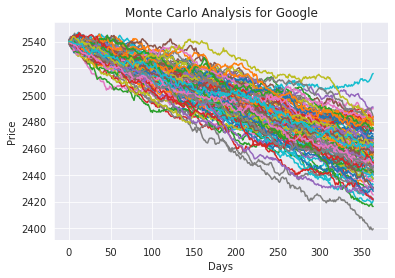

In [ ]:
for run in range(100):
  plt.plot(stock_monte_carlo(start_price, days, mu, dt))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [ ]:
runs = 10000
simulations = np.zeros(runs)
for run in range(runs):
  simulations[run] = stock_monte_carlo(start_price, days, mu, dt)[days-1]

In [ ]:
q = np.percentile(simulations,1)

In [ ]:
simulations

array([2467.81451123, 2429.13787268, 2415.6849632 , ..., 2458.99557525,
       2454.0102096 , 2452.34252395])

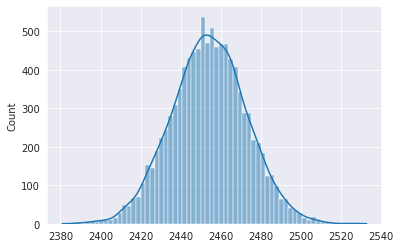

In [ ]:
sns.histplot(data=simulations,
             kde=True)

(array([  1.,   0.,   0.,   0.,   2.,   3.,   0.,   1.,   3.,   6.,   4.,
          3.,   5.,   6.,   8.,   6.,   9.,  10.,  16.,  25.,  36.,  28.,
         38.,  42.,  50.,  41.,  74.,  97.,  93.,  98., 122., 126., 145.,
        161., 149., 198., 192., 215., 223., 242., 279., 286., 296., 294.,
        301., 342., 345., 315., 324., 327., 301., 324., 294., 291., 316.,
        278., 264., 273., 218., 188., 199., 182., 147., 156., 130., 140.,
         92.,  86.,  82.,  70.,  64.,  50.,  46.,  44.,  31.,  26.,  21.,
         15.,  22.,  12.,   5.,   7.,  15.,   5.,   4.,   3.,   2.,   4.,
          1.,   0.,   0.,   0.,   1.,   0.,   2.,   1.,   0.,   0.,   0.,
          1.]),
 array([2380.90837511, 2382.42701258, 2383.94565005, 2385.46428751,
        2386.98292498, 2388.50156245, 2390.02019992, 2391.53883739,
        2393.05747485, 2394.57611232, 2396.09474979, 2397.61338726,
        2399.13202473, 2400.6506622 , 2402.16929966, 2403.68793713,
        2405.2065746 , 2406.72521207, 2408.243

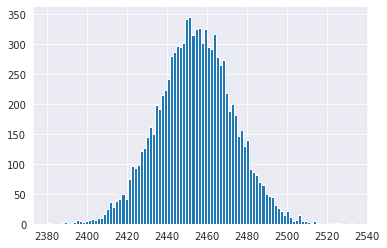

In [ ]:
plt.hist(simulations, bins=100)



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


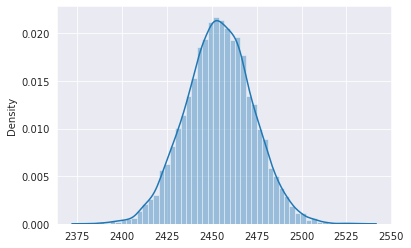

In [ ]:
sns.distplot(simulations)